# APPLICATIONS OF MACHINE LEARNING TO ECONOMICS AND FINANCE

## Scikit-learn
Machine learning library in Python <br/>
<br/> **Required**
* Python (>=3.5)
* NumPy (>=1.11.0)
* SciPy (>=0.17.0)

**Reference** <br/>
* sklearn User Guide <https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model>

## Regression
The objective of a regression model is to find a **relationship** between one or more *features (independent variables)* and a *target (dependent variable)*. 

## Simple Linear Regression

\begin{align}
y & = \beta_0 + \beta_1 x \\
\end{align}

* $y$: target (dependent variable). This is also called a response variable.
* $x$: features (independent variables). This is also called an explanatory variable.
* $\beta_0$: the intercept. The estimated response $f(x)$ for $x = 0$
* $\beta_1$: the slope. How much does $y$ change for a one unit change in $x$

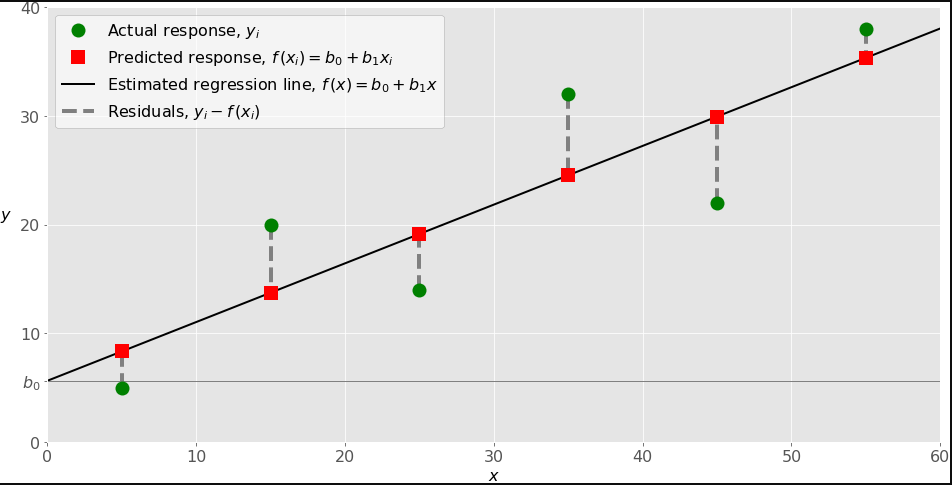

In [1]:
Image(filename = "img/slr.png", width = 800, height = 400)

## Multiple Linear Regression
Linear regression with two or more features.

\begin{align}
y & = \beta_0 + \beta_1 x + ... + \beta_n x_n\\
\end{align}

## Polynomial Regression
Generalized case of linear regression.
* Including non-linear terms such as $\beta_2 x_1^2$ , $\beta_3 x_1^3$, or $\beta_4 x_1 x_2$

## Example

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data: Housing price prediction**

* Avg. Area Income': Avg. Income of residents of the city house is located in.
* Avg. Area House Age': Avg Age of Houses in same city
* Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* Area Population': Population of city house is located in
* Price': Price that the house sold at
* Address': Address for the house

In [12]:
fetch_housing_data()

NameError: name 'fetch_housing_data' is not defined

In [15]:
USAhousing = pd.read_csv('data//0USA_Housing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data//USA_Housing.csv'

In [ ]:
USAhousing.head()

In [ ]:
USAhousing.info()

In [ ]:
USAhousing.describe()

In [ ]:
USAhousing.columns

**Exploratory Data Analysis (EDA)**

In [ ]:
sns.pairplot(USAhousing)

In [ ]:
sns.distplot(USAhousing['Price'])

In [ ]:
sns.heatmap(USAhousing.corr())

**Train Test Split**

In [6]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

NameError: name 'USAhousing' is not defined

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

NameError: name 'X' is not defined

**Train the model**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train,y_train)

NameError: name 'X_train' is not defined

**Results**

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

**Test the model**

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# R-square
from sklearn.metrics import mean_squared_error, r2_score
print('R-square: %.2f' % r2_score(y_test, predictions))

## Underfitting and Overfitting

**Coefficient of Determination, denoted as R-square $R^2$** <br/>
The proportion of the total sample variability around y that is explained by the linear relationship between y and x
* range from 0 to 1

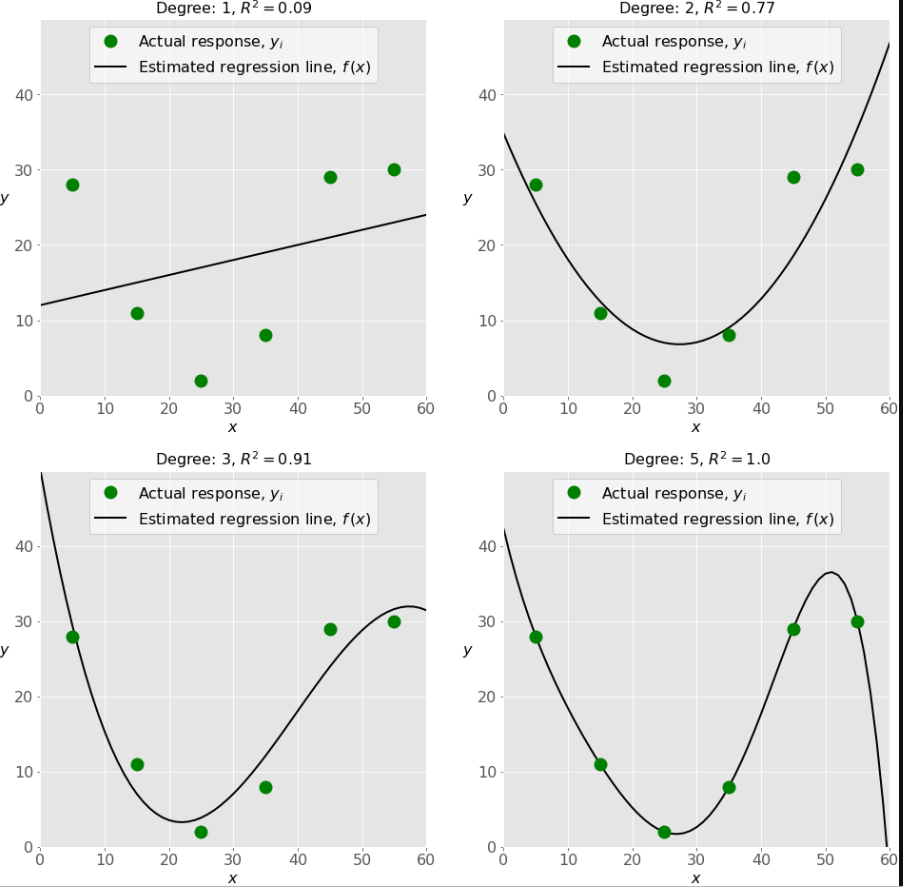

In [2]:
from IPython.display import Image 
Image(filename = "img/fit.png", width = 800, height = 400)

### Ways to combat overfitting

1. **Use more training data** 
2. **Use regularization**

### Ways to combat underfitting

1. **Increase the size or number of parameters in the model** 
2. **Increase the complexity of the model**

In [ ]:
# Residual
sns.distplot((y_test-predictions),bins=50);

### (Advanced) Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Recall 
Linear function of features is one of the simplest way to predict target.

\begin{align}
y & = \beta_0 + \beta_1 x + ... + \beta_n x_n + \epsilon \\
\end{align}


\begin{align}
\hat{y} & = \beta_0 + \beta_1 x + ... + \beta_n x_n \\
\end{align}

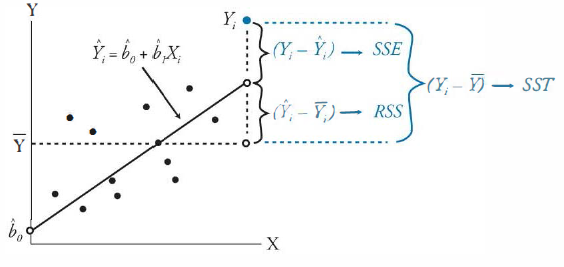

In [1]:
from IPython.display import Image 
Image(filename = "img/variance.png", width = 600, height = 400)

To minimize the residual (the error), the cost function can be written as

\begin{align}
\epsilon = \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left (y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2
\end{align}

A model in presence of a large number of features: <br/>
1. enhance the tendency to overfit or
2. cause computational challenges

**Ridge and Lasso regression are one of the simple techniques to reduce model complexity and prevent overfitting**

## Ridge
Put constraint on the coefficients $\beta$. The penalty term $\lambda$ regularizes the coefficients.

\begin{align}
\sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left( y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2 + \lambda \sum_{j=1}^m \beta_j^2
\end{align}

For some $c > 0$, $\sum_{j=1}^m \beta_j^2 < c$

## Lasso
Also help in feature selection.

\begin{align}
\sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 =  \sum_{i=1}^n \left( y_i - \sum_{j=1}^m \beta_jx_{ij} \right)^2 + \lambda \sum_{j=1}^m  \left\lvert \beta_j \right\rvert 
\end{align}

For some $t > 0$, $\sum_{j=1}^m \left\lvert \beta_j \right\rvert < c$

## $\lambda$
$\lambda$ determines the regularization strength. $\lambda$ can take various values.

* $\lambda = 0 $ <br/>
  The objective becomes same as simple linear regression.
* $\lambda = \infty $ <br/>
  Infinite weightage makes the coefficients to be zero. 
* $0 < \lambda < \infty$ <br/>
  The magnitude of $\lambda$ will decide the weightage.

## Example

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [ ]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [ ]:
## polynomial regression
for i in range(2,16): 
    colname = 'x_%d'%i  
    data[colname] = data['x']**i

In [ ]:
data.head()

### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

### Lasso

In [31]:
from sklearn.linear_model import Lasso

In [ ]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

## Logistic Regression

What if the dependent variable has only two possible outcomes:

‘1’ for true/success; or <br/>
‘0’ for false/failure

<br/>

Logistic Regression is a supervised machine learning algorithm used in **binary classification**. Logistic Regression fits a line to a dataset and then returns the probability that a new sample belongs to one of the two classes according to its location with respect to the line. In Logistic Regression, we use the **Sigmoid function** to describe the probability that a sample belongs to one of the two classes. The shape of the Sigmoid function determines the probabilities predicted by our model. When we train our model, we are in fact attempting to select the Sigmoid function whose shape best fits our data. <br/>

**Sigmoid Function**
\begin{equation*}
\sigma(z) = \frac{1} {1+e^{-z}} = 1
\end{equation*}

**Equation for the line**
\begin{equation*}
z = \sum w_ix_i + \epsilon_i
\end{equation*}

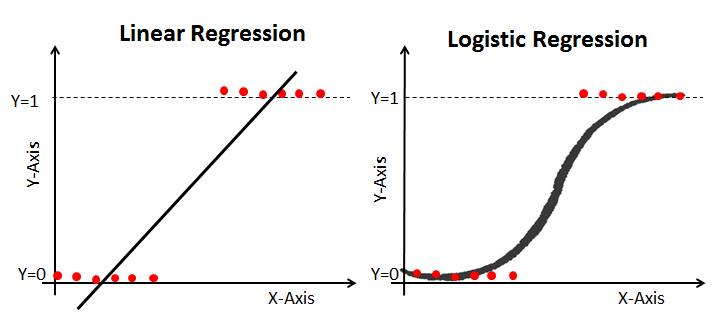

In [1]:
from IPython.display import Image 
Image(filename = "img/linear_vs_logistic_regression_edxw03.png", width = 800, height = 800)

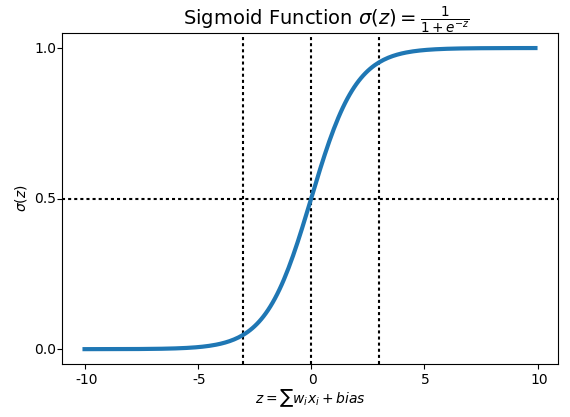

In [2]:
Image(filename = "img/sigmoid.png", width = 600, height = 400)

## Example

[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

In [ ]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head()

### Missing data

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

### Data cleaning

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

### Dummy Variable

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

train = pd.concat([train,sex,embark],axis=1)

train.head()

In [ ]:
#alternative

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['Sex'] = label_encoder.fit_transform(train['Sex'])

In [ ]:
train.head()

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

# Good Job!

## Exercise

**Data**: The Ecommerce Customers csv file from the company. 

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! 

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

**Read in the Ecommerce Customers csv file as a DataFrame called customers**

In [17]:
Eco = pd.read_csv('C://Users//ryans//Downloads//Ecommerce Customers.csv')

In [18]:
Eco.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
Eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
Eco.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


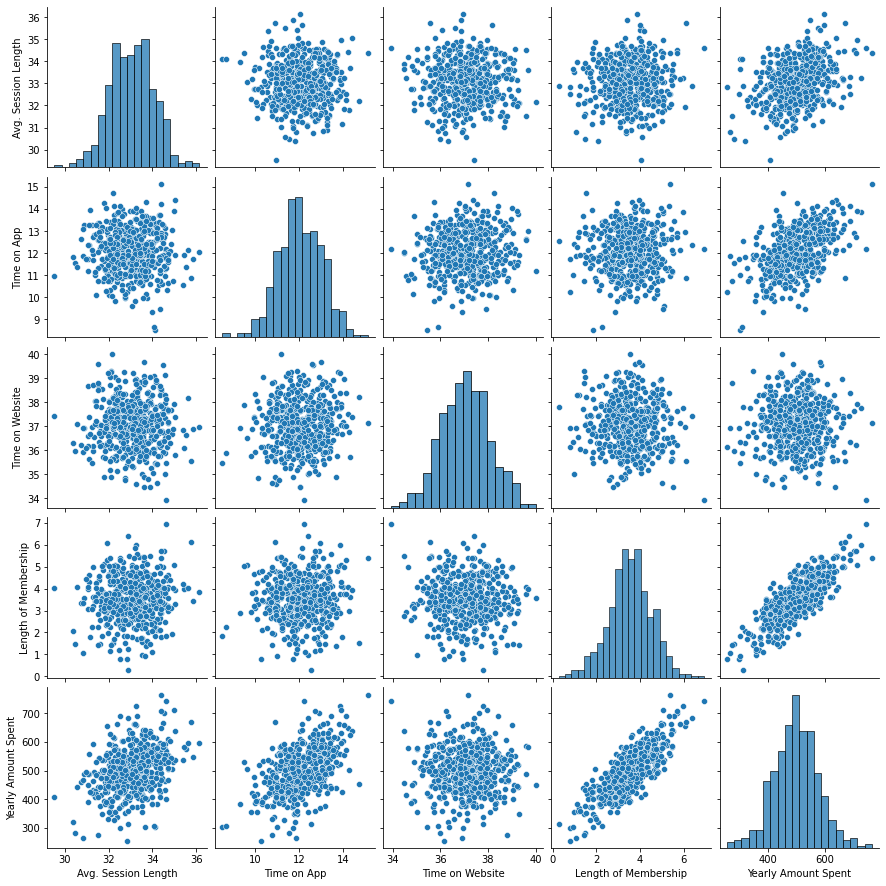

In [21]:
sns.pairplot(Eco)

C:\Users\ryans\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

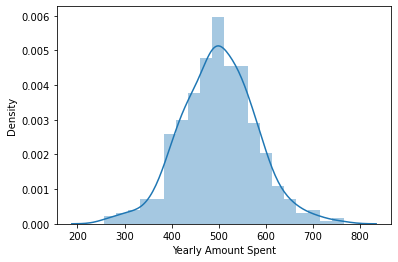

In [33]:
sns.distplot(Eco['Yearly Amount Spent'])

<AxesSubplot:>

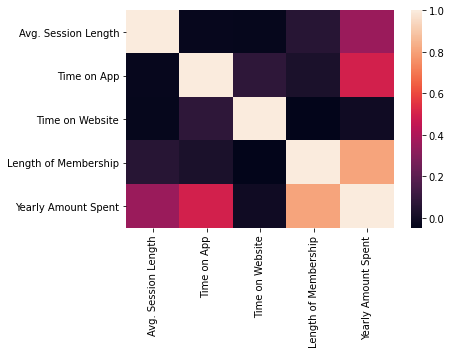

In [32]:
sns.heatmap(Eco.corr())

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [26]:
X = Eco[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = Eco['Yearly Amount Spent']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [29]:
print(lm.intercept_)

-1045.1152168245744


In [38]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

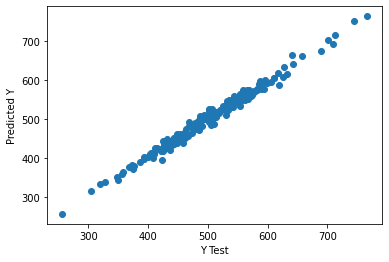

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
print('R-square: %.2f' % r2_score(y_test, predictions))

R-square: 0.99


C:\Users\ryans\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


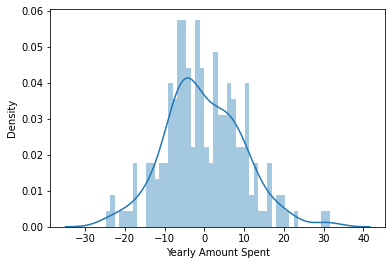

In [42]:
sns.distplot((y_test-predictions),bins=50);